
![Clothing Classifier Model](Clothing%20Classifier%20Model.png)


Fashion Forward is a new AI-based e-commerce clothing retailer.
They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a garment classifier, your primary objective is to develop a machine learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [1]:
# Run the cells below first

In [2]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


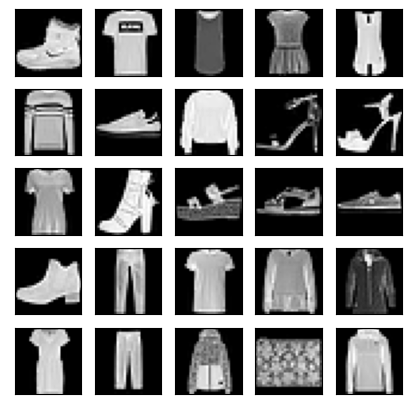

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

- Define a CNN classifier as a Sequential model with the following layers:
  - Convolution layer with 32 filters, kernel size 3 and stride 1, followed by a rectilinear unit (relu) activation.
  - Convolution layer with 16 filters, kernel size 3 and stride 1, followed by a rectilinear unit (relu) activation.
  - Flatten layer.
  - Dense layer with the appropriate number of units and activation function.
- Train your CNN on the given train_images using a suitable optimizer.
  - Only run your training loop for a single epoch to keep the run time down.
  - Use accuracy as a metric, and an appropriate loss function.
- Evaluate your CNN on the given test_images:
  - Calculate the accuracy of your trained classifier on the test_images, storing your answer in the variable test_accuracy.
The above instructions are what you will need to use to submit the project, but once you've passed the project, feel free to experiment with the model architecture and training arguments to achieve a better accuracy!

In [5]:
# Start coding here
# Use as many cells as you need

# Solution

In [ ]:
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

num_classes = len(set(train_labels))
img_size = train_images[0].shape[0]

# Convert the labels to 1-hot encoded form
# (You can skip this step if you use the `sparse_categorical_crossentropy` loss function)
train_labels_1h = to_categorical(train_labels)
test_labels_1h = to_categorical(test_labels)

# Define the model
model = Sequential()
# Add a convolutional layer with 32 filters of size 3x3 
model.add(Conv2D(32, kernel_size=3, input_shape=(img_size, img_size, 1), activation = 'relu'))
# Add a convolutional layer with 16 filters of size 3x3
model.add(Conv2D(16, kernel_size=3, activation='relu'))
# Flatten the previous layer output 
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Fit the model to the training data 
model.fit(train_images, train_labels_1h, 
          validation_split=0.2, 
          epochs=1, batch_size=100)

# Evaluate the model on the test data
scores = model.evaluate(test_images, test_labels_1h, batch_size=100)
test_accuracy = scores[-1]
print(f'Test accuracy: {test_accuracy:.2f}')
